# Import Packages

In [37]:
import os
import sys
import numpy as np
import pandas as pd

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.helpers import load_data

# Load data

In [38]:
data = load_data("train.csv")

# Handling missing values
We will handle the following missing values:
1. MSZoning - we will group by MSSubClass and fill in with the mode
2. LotFrontage - we will impute using the median to avoid skewing the results due to outliers based on related Neighborhood
3. 

In [39]:
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Handling outliers
1. LotFootage - We will handle outliers by capping with the IQR
2. 

In [49]:
Q1 = data['LotFrontage'].quantile(0.25)
Q3 = data['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['LotFrontage_Log'] = np.log1p(data['LotFrontage'])
data['LotFrontage_Capped'] = data['LotFrontage'].clip(lower=lower_bound, upper=upper_bound)

Missing values count: 0
Missing values percentage: 0.0%


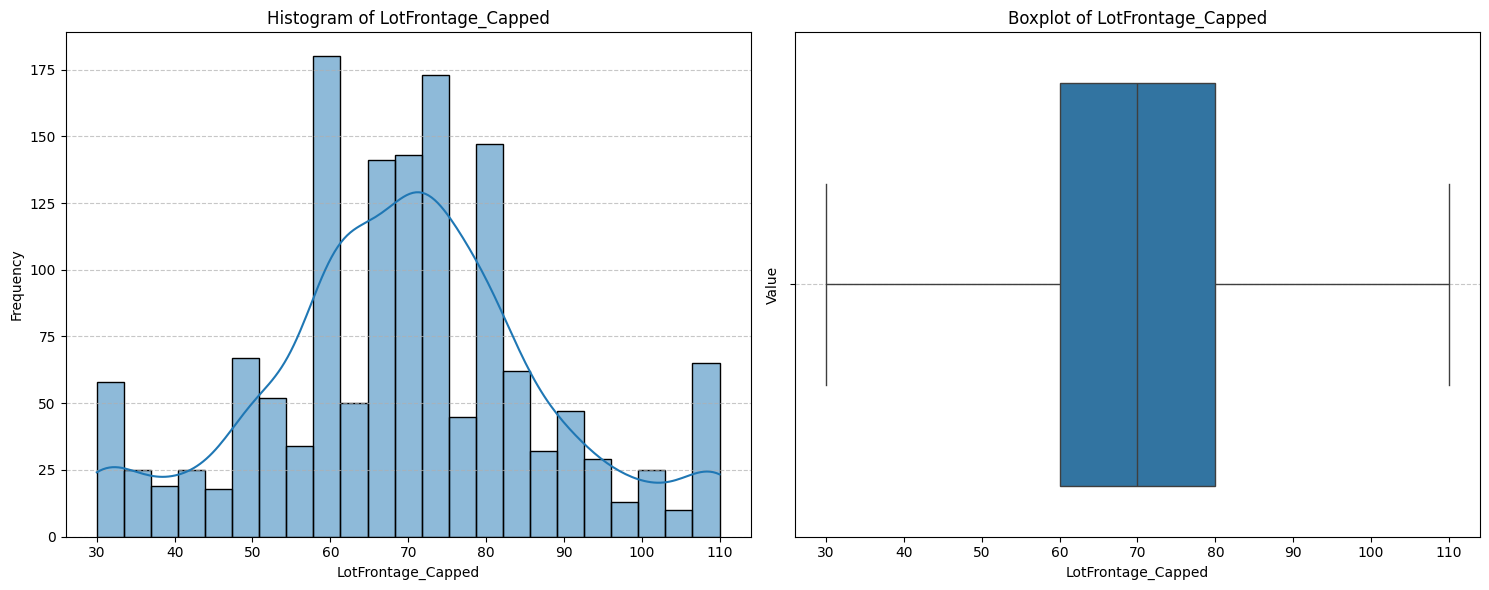

In [50]:

from utils.plotting import DataVisualiser
from utils.helpers import check_and_print_missing_value_counts

import numpy as np
data['LotArea_Log'] = np.log1p(data['LotArea'])  # Use log1p to handle zero values

check_and_print_missing_value_counts(data, 'LotFrontage_Capped')
visualizer = DataVisualiser(data)
visualizer.plot('LotFrontage_Capped')

<Axes: >

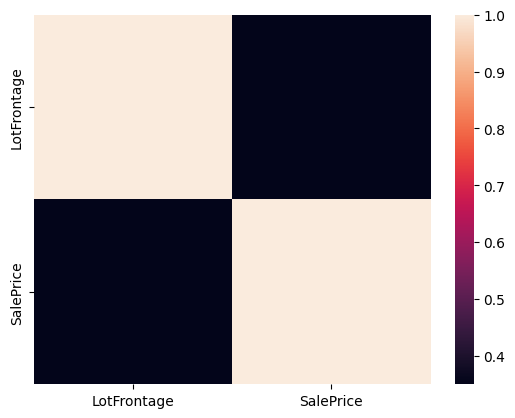

In [22]:
import seaborn as sns
sns.heatmap(data[['LotFrontage', 'SalePrice']].corr())

<Axes: xlabel='LotArea_Log', ylabel='SalePrice'>

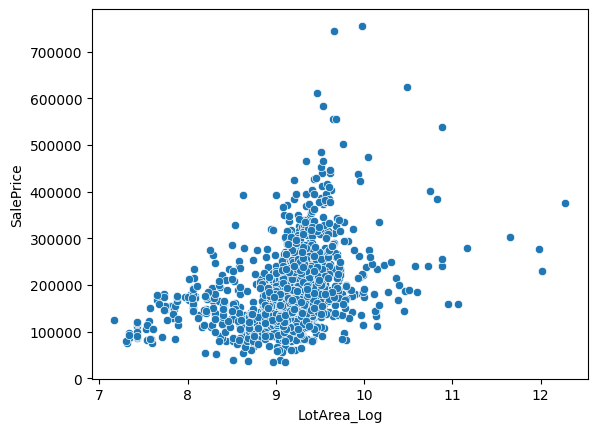

In [36]:
sns.scatterplot(x="LotArea_Log", y="SalePrice", data=data)